In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
%matplotlib inline

In [4]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [3]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20150915_Beamprofiler_meas\output_crystal_#002.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)


(0, 1024)

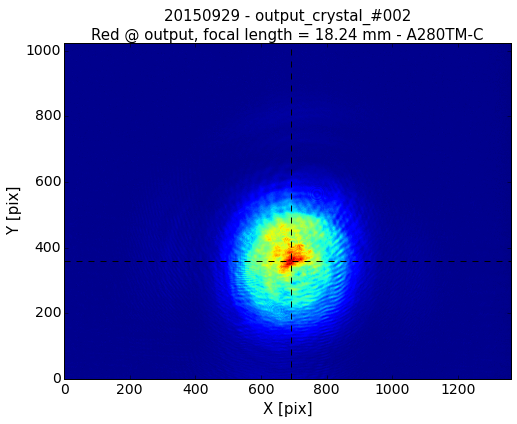

In [4]:
n_row = 360
n_col = 690
title = '20150929 - ' + tail[:-4] + '\nRed @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,1360)
plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

3.1046


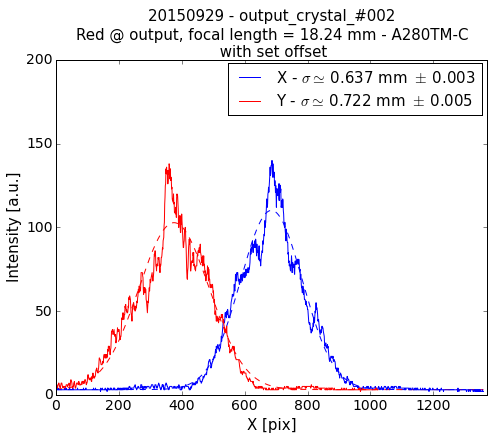

In [5]:
y_max = 200
fit_with_free_offset = False

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),40, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),40, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*6.45/1e3, np.sqrt(x_pcov[2,2])*6.45/1e3))
    plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*6.45/1e3, np.sqrt(y_pcov[2,2])*6.45/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:100,0:100])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),40]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),40]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*6.45/1e3, np.sqrt(x_pcov[2,2])*6.45/1e3))
    plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*6.45/1e3, np.sqrt(y_pcov[2,2])*6.45/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [6]:
print np.argmax(a[:,n_col])

360


In [7]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20150915_Beamprofiler_meas\output_crystal_higher_spatial_mode_#001.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)


(0, 1024)

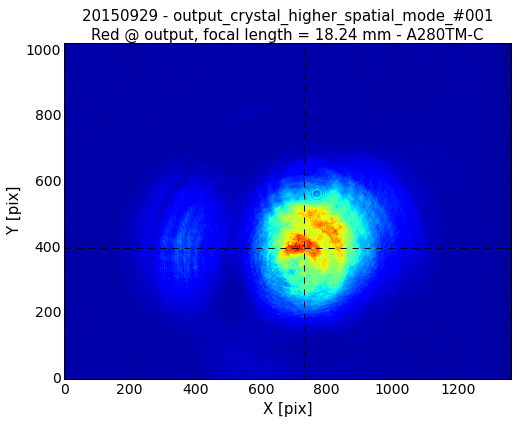

In [8]:
n_row = 400
n_col = 730
title = '20150929 - ' + tail[:-4] + '\nRed @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,1360)
plt.ylim(0,1024)


2.9881


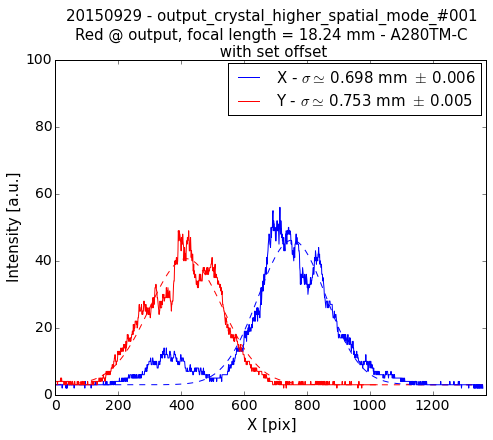

In [9]:
y_max = 100
fit_with_free_offset = False

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),40, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),40, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*6.45/1e3, np.sqrt(x_pcov[2,2])*6.45/1e3))
    plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*6.45/1e3, np.sqrt(y_pcov[2,2])*6.45/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:100,0:100])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),40]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),40]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*6.45/1e3, np.sqrt(x_pcov[2,2])*6.45/1e3))
    plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*6.45/1e3, np.sqrt(y_pcov[2,2])*6.45/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [10]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20150929_beamprofile\output_pump_lens30mm_#005.csv"
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

(0, 1024)

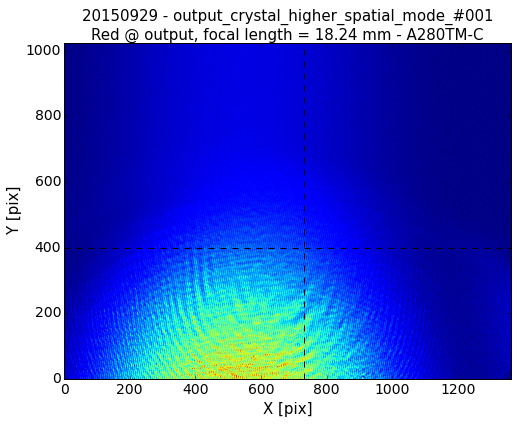

In [11]:
n_row = 400
n_col = 730
title = '20150929 - ' + tail[:-4] + '\nRed @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,1360)
plt.ylim(0,1024)

15.7619


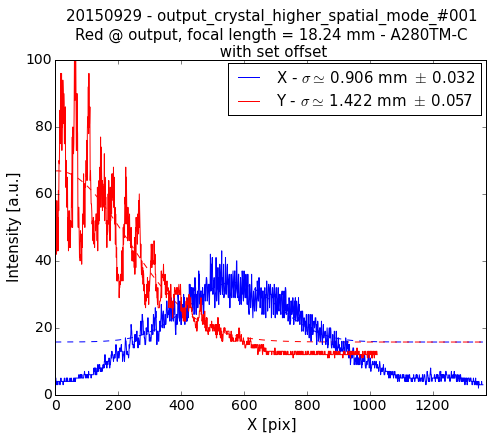

In [12]:
y_max = 100
fit_with_free_offset = False

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),40, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),40, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*6.45/1e3, np.sqrt(x_pcov[2,2])*6.45/1e3))
    plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*6.45/1e3, np.sqrt(y_pcov[2,2])*6.45/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:100,0:100])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),40]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),40]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*6.45/1e3, np.sqrt(x_pcov[2,2])*6.45/1e3))
    plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*6.45/1e3, np.sqrt(y_pcov[2,2])*6.45/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [5]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Telecom_output3_z_lens_7_32_location1.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)


CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 44 compare to 1024
        Number of columns : 64 compare to 1360.


(0, 44)

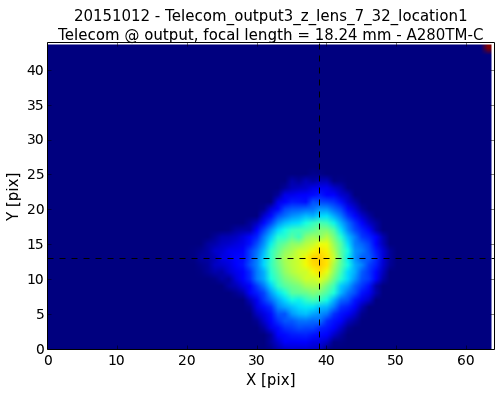

In [10]:
n_row = 13
n_col = 39
title = '20151012 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

2.33182859504


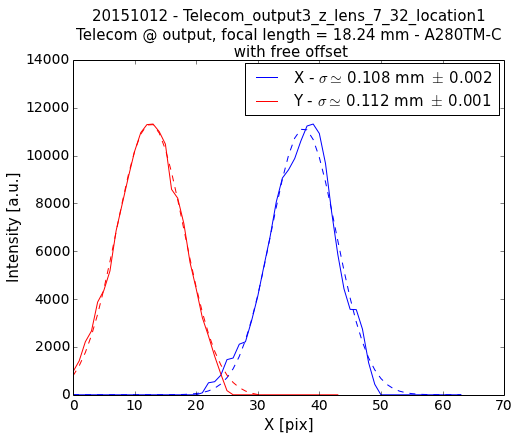

In [22]:
y_max = 14e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [23]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Telecom_output4_z_lens_7_28_location1.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 44 compare to 1024
        Number of columns : 64 compare to 1360.


(0, 44)

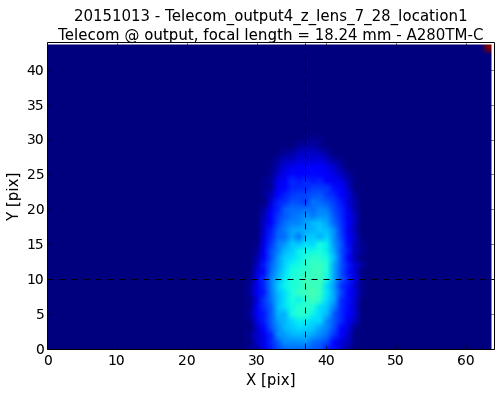

In [25]:
n_row = 10
n_col = 37
title = '20151013 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

-205.963605729


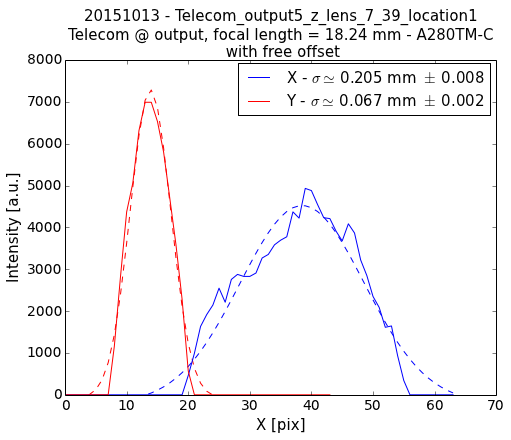

In [29]:
y_max = 8e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [27]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Telecom_output5_z_lens_7_39_location1.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 44 compare to 1024
        Number of columns : 64 compare to 1360.


(0, 44)

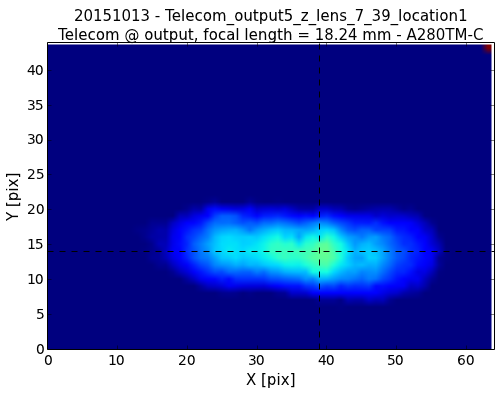

In [31]:
n_row = 14
n_col = 39
title = '20151013 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

-618.480181028


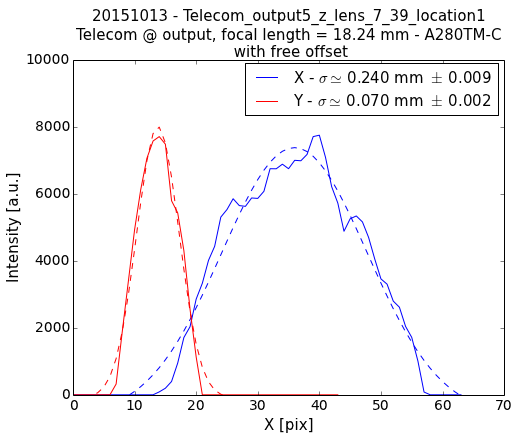

In [34]:
y_max = 10e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [37]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Telecom_output6_z_lens_7_33_location2.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 504 compare to 1024
        Number of columns : 640 compare to 1360.


(0, 504)

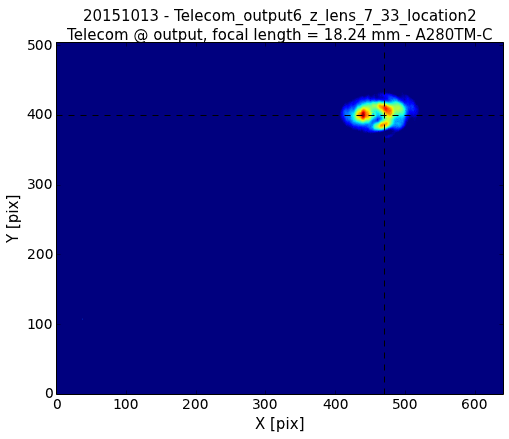

In [42]:
n_row = 400
n_col = 470
title = '20151013 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

-81.7787525477


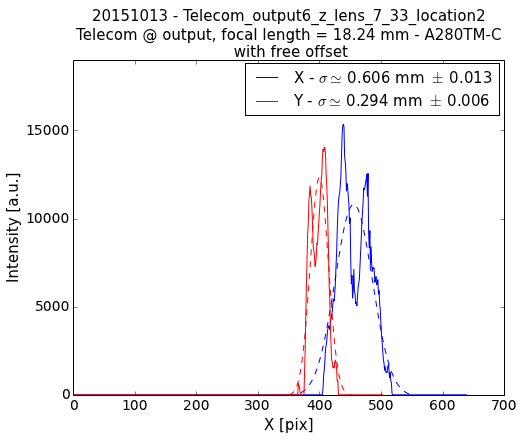

In [47]:
y_max = 19e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [49]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Telecom_output7_z_lens_7_20_location2.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 96 compare to 1024
        Number of columns : 128 compare to 1360.


(0, 96)

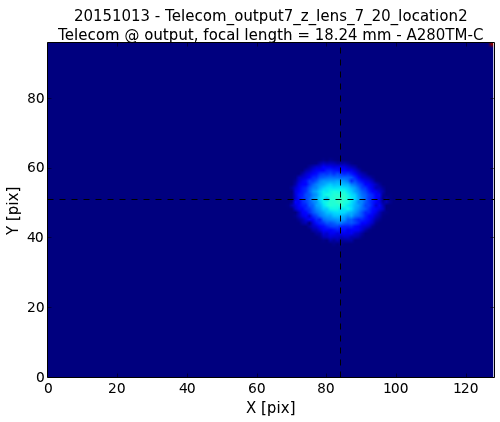

In [54]:
n_row = 51
n_col = 84
title = '20151013 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

-39.7381572467


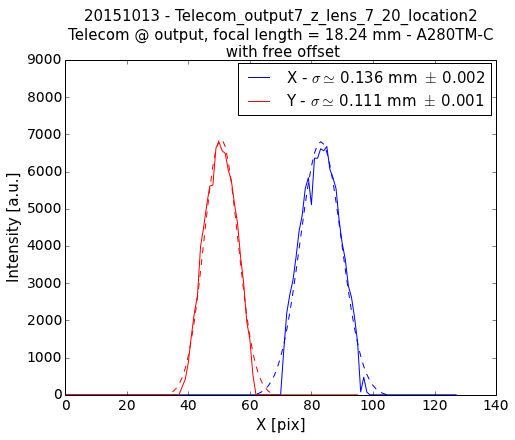

In [56]:
y_max = 9e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [57]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Telecom_output8_z_lens_7_19_location2.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 96 compare to 1024
        Number of columns : 128 compare to 1360.


(0, 96)

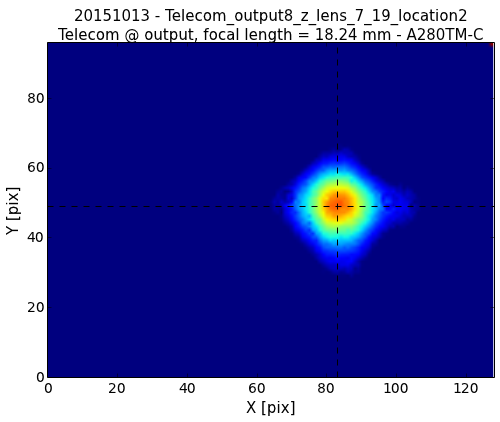

In [59]:
n_row = 49
n_col = 83
title = '20151013 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

7.49189587418


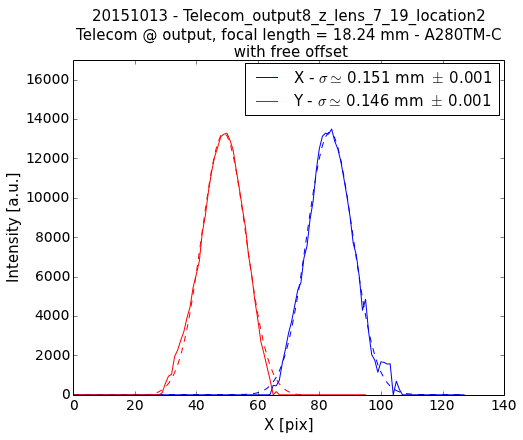

In [64]:
y_max = 17e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [65]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Red_output9_z_lens_7_19_location3.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 504 compare to 1024
        Number of columns : 640 compare to 1360.


(0, 504)

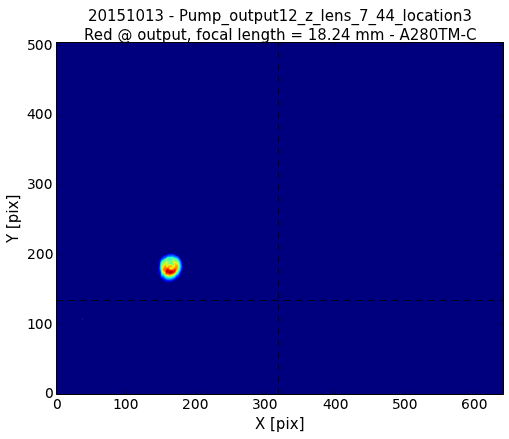

In [95]:
n_row = 135
n_col = 318
title = '20151013 - ' + tail[:-4] + '\nRed @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

-16.0372552292


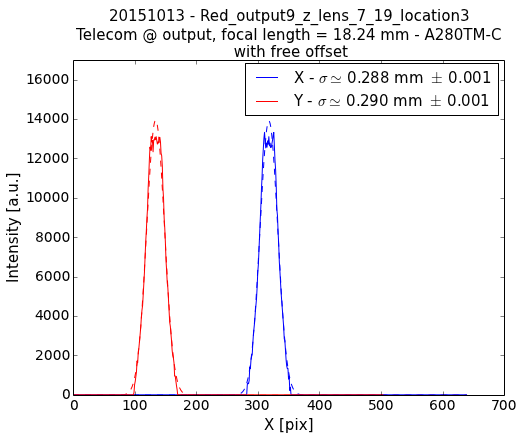

In [73]:
y_max = 17e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [74]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Red_output10_z_lens_7_19_location3.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 504 compare to 1024
        Number of columns : 640 compare to 1360.


(0, 504)

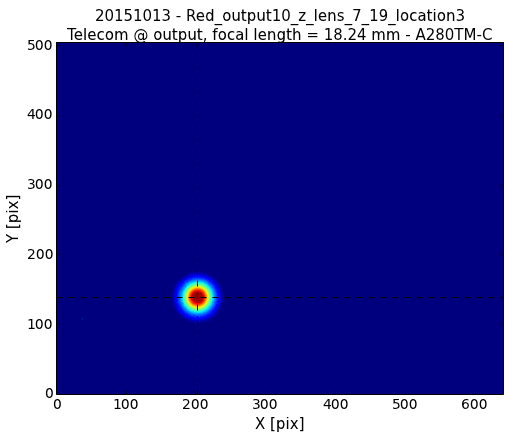

In [79]:
n_row = 139
n_col = 202
title = '20151013 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

-13.9959266195


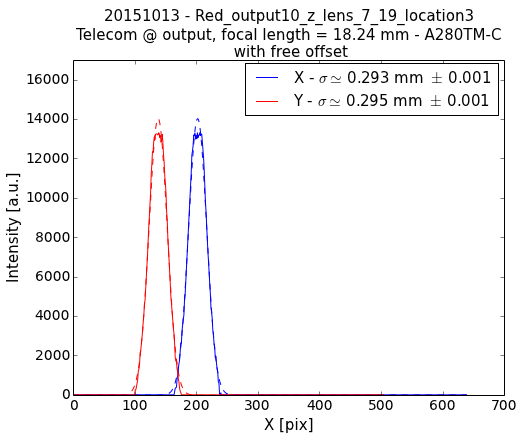

In [80]:
y_max = 17e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [83]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Red_output11_z_lens_6_10_location3.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 504 compare to 1024
        Number of columns : 640 compare to 1360.


(0, 504)

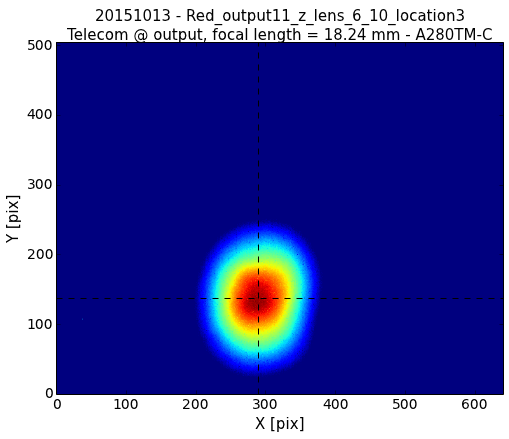

In [88]:
n_row = 138
n_col = 290
title = '20151013 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

-79.0628357299


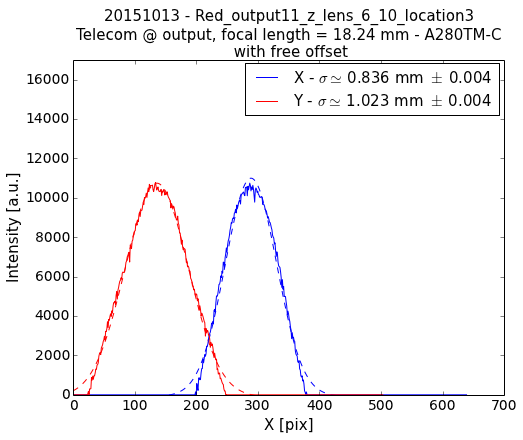

In [89]:
y_max = 17e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [90]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20151012\Pump_output12_z_lens_7_44_location3.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

CAUTION ! The number of columns or rows is not the expected one.
        Number of rows : 504 compare to 1024
        Number of columns : 640 compare to 1360.


(0, 504)

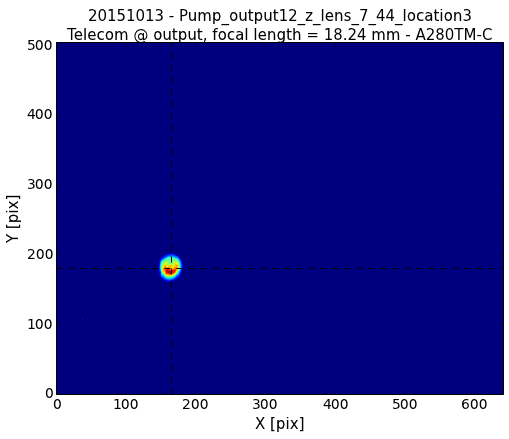

In [93]:
n_row = 180
n_col = 165
title = '20151013 - ' + tail[:-4] + '\nTelecom @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

#fig = plt.figure(figsize=(8, 8/nb_row*nb_col))
fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,nb_col)
plt.ylim(0,nb_row)
#plt.xlim(0,1360)
#plt.ylim(0,1024)

#plt.colorbar()

#cax = fig.add_axes([0.12, 0.28, 1, 0.45])
#cax.get_xaxis().set_visible(False)
#cax.get_yaxis().set_visible(False)
#cax.patch.set_alpha(0)
#cax.set_frame_on(False)
#plt.colorbar(orientation='vertical')

-28.0432368134


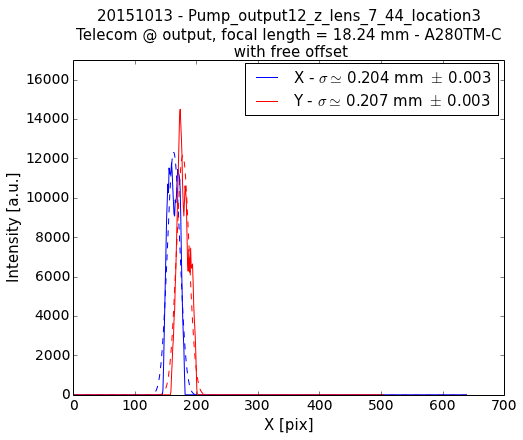

In [94]:
y_max = 17e3
fit_with_free_offset = True

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:10,0:10])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),4]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),4]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*20/1e3, np.sqrt(x_pcov[2,2])*20/1e3))
    #plt.xlim(0,70)
    #plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*20/1e3, np.sqrt(y_pcov[2,2])*20/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])

In [96]:
fp = r"K:\ns\qt\Diamond\Projects\QTelecom_project\Data\20150911_Beamprofiler_meas\red_input_after_dichoric_1_#001.csv"
head, tail = os.path.split(fp)
a = np.loadtxt(open(fp,"rb"),delimiter=";",skiprows=8)

(0, 1024)

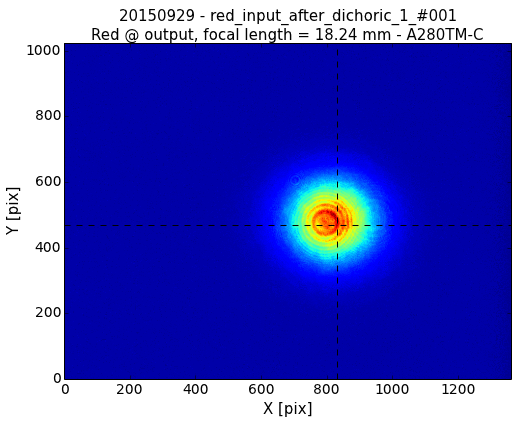

In [99]:
n_row = 470
n_col = 830
title = '20150929 - ' + tail[:-4] + '\nRed @ output, focal length = 18.24 mm - A280TM-C'
nb_row = len(a)
nb_col = len(a[0])
if (nb_row != 1024| nb_col != 1360) :
    print 'CAUTION ! The number of columns or rows is not the expected one.\n\
        Number of rows : {} compare to 1024\n\
        Number of columns : {} compare to 1360.'.format(nb_row, nb_col)

fig = plt.figure(figsize=(8, 8/1024.*1360))

ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 15)
plt.imshow(a)
ax.set_aspect('equal')
#plt.ylim(0,3)

plt.ylabel('Y [pix]', fontsize = 15)
plt.xlabel('X [pix]', fontsize = 15)
plt.tick_params(axis = 'both',which ='major',labelsize=14)
ax.plot([0,1360], [n_row, n_row],'k--')
ax.plot([n_col, n_col],[0,1024],'k--')
plt.xlim(0,1360)
plt.ylim(0,1024)

2.9726


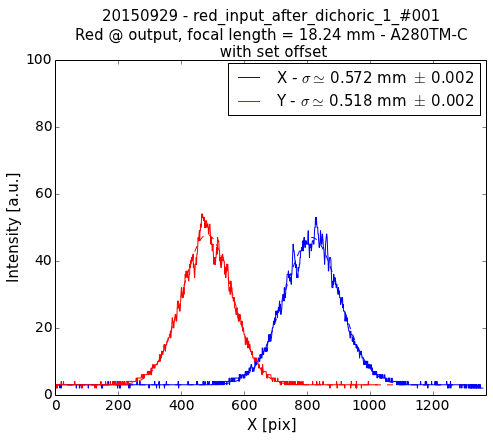

In [100]:
y_max = 100
fit_with_free_offset = False

fig = plt.figure(figsize=(6/1064.*1370,6))

ax = fig.add_subplot(111)


if fit_with_free_offset:
    
    def gauss(x, *p):
        A, mu, sigma , offset = p
        return offset + A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
    ax.set_title(title+'\n with free offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),40, a[0,0]]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),40, a[0,0]]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*6.45/1e3, np.sqrt(x_pcov[2,2])*6.45/1e3))
    plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*6.45/1e3, np.sqrt(y_pcov[2,2])*6.45/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    
    print x_popt[3]

else :

    def gauss(x, *p):
        A, mu, sigma  = p
        return  A*np.exp(-(x-mu)**2/(2.*sigma**2)) + np.mean(a[0:100,0:100])
    
    ax.set_title(title+'\n with set offset', fontsize = 15)

    p0 = [np.max(a[n_row,:]),np.argmax(a[n_row,:]),40]
    x_popt, x_pcov = curve_fit(gauss, np.linspace(0,nb_col,nb_col), a[n_row,:], p0 = p0)
    x_fit = gauss(np.linspace(0,nb_col,nb_col), *x_popt)
    plt.plot(x_fit, 'b--')

    p0 = [np.max(a[:,n_col]), np.argmax(a[:,n_col]),40]
    y_popt, y_pcov = curve_fit(gauss, np.linspace(0,nb_row,nb_row), a[:,n_col], p0=p0)
    y_fit = gauss(np.linspace(0,nb_col,nb_col), *y_popt)
    plt.plot(y_fit, 'r--')


    plt.plot(a[n_row,:], label='X - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(x_popt[2]*6.45/1e3, np.sqrt(x_pcov[2,2])*6.45/1e3))
    plt.xlim(0,1370)
    plt.ylim(0,y_max)
    plt.plot(a[:,n_col], 'r', label ='Y - $\sigma \simeq$ {:.3f} mm $\pm$ {:.3f}'.format(y_popt[2]*6.45/1e3, np.sqrt(y_pcov[2,2])*6.45/1e3))

    plt.ylabel('Intensity [a.u.]', fontsize = 15)
    plt.xlabel('X [pix]', fontsize = 15)
    plt.tick_params(axis = 'both',which ='major',labelsize=14)
    plt.legend(bbox_to_anchor=(0.40, 0.99), loc=2, borderaxespad=0.,fontsize = 15)
    
    print np.mean(a[0:100,0:100])